## Lasso Presentation

### Introduction

   Often when considering a complex prediction problem, it’s difficult to know which factors affect the outcome of interest. This difficulty arises especially in data characterized by a large set of primary explanatory variables for which there are few observations, perhaps causing the number of variables to have the same order of magnitude as the observations. Data with many explanatory variables and relatively few observations appear frequently in financial, medical, and economic research.  Without regularizing (or shrinking) the coefficients for questions like which of the thousands of genes cause cancer, statistical models on such high magnitude data would be very unstable.  To make these problems more workable, researchers have designed regularization methods specifically to handle high dimensional data. One of these methods more recently developed is called Lasso.
   
   Lasso stands for Least Absolute Shrinkage and Selection Operator. Lasso is a regression which relies on penalties to reduce (“shrink”) the values of predicted coefficients towards 0. While some shrinkage methods have been around since the 1960s (see Hoerl), Lasso regression was first pioneered by Robert Tibshirani in his 1996 paper “Regression Shrinkage and Selection via the Lasso.” Until that time, the standard techniques for improving OLS estimates were best subset selection and ridge regression, but both have drawbacks. Best subset selection converts some coefficients to 0, making the models more interpretable. However, this model can be extremely volatile because its discrete process either drops a regressor entirely or keeps it with coefficient otherwise unaltered. Its predictive accuracy suffers because small changes in sample data may generate very different variable selection. Though ridge regression is a continuous, more stable process for shrinking coefficients, it cannot eliminate any regressors and hence does not give an easily interpretable model. Lasso, on the other hand, retains the good features of simple subset selection and ridge regression: interpretability and accuracy (Tibshirani 1996).
    
   Lasso is best suited to deal with models that show a high level of multicollinearity.  Multicollinearity exists whenever two or more of the predictors in a regression model are moderately or highly correlated. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients as constraints. This type of regularization subtracts a constant from all coefficients.  Using soft thresholding, any coefficient that reaches or passes 0 after the penalty is forced to 0. Thus, depending on the level of penalty, Lasso can eliminate parameters and produce sparse models with few covariates. Larger penalties increase the number of eliminated covariates, lowering the variance while increasing the bias. In contrast, small penalties produce less interpretable models with high variance but low bias (Chan-Lau 2017). The trade-off between bias and variance is a major component of specifying a Lasso model. In practice, researchers employ cross-validation to determine the optimal penalty level.  Though Lasso offers advantages to other shrinkage methods or least squares, it is not without disadvantages. Drawbacks from Lasso include potentially removing important control variables and arbitrarily dropping regressors from a group of important, highly correlated ones. Therefore, depending on the intent of the study and the nature of the dataset, Lasso may or may not be the best model to apply.
    
   Although Lasso has only been discussed in the context of linear regressions, the technique may be more broadly applied. Lasso-type estimators can also accommodate models other than the linear models. It is possible to use Lasso estimators in generalized linear models including logistic regression, multiclass logistic regression, Cox proportional hazard models, support vector machines, and also in semiparametric nonlinear mixed effect models (Arribas-Gil, Bertin, Meza, and Rivoirard 2014) and nonlinear regressions (Tateishi, Matsui, and Konishi 2010).


In [1]:
from IPython.display import Image
PATH = "/Users/J.Alvarez/Pictures/Screenshots/"

### Analytical framework

Need:
<ul>
    <li>Assumptions</li>
    <li>Model, in math and words</li>
    <li>Choice of t, theoretical/practical</li>
    <li>Technical prop: biasedness, variance</li>
</ul>


	Lasso is a regression technique that modifies the estimates of unconstrained regressions. There are two choices necessary to using the model: an unconstrained regression type and a constraint value. In this technical description of Lasso, we will assume a linear model. The linear model may be exchanged for a more complicated one, but the basic linear system is sufficient to represent the Lasso methodology. The base model chosen is dependent on the assumptions made about the relationship between the data and outcome of interest. Assume there are Nobservations and p parameters. Then, given a set of parameters and an outcome variable, the relationship of interest is    

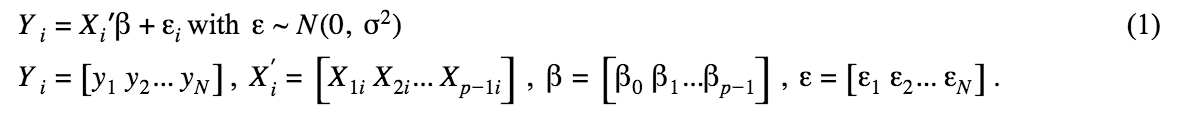

In [2]:
Image(filename = PATH + "eqn1.png", width=1000, height=100)

    To perform Lasso, we need to minimize the squared residuals under the constraint that the sum of the magnitude of all estimated coefficients be limited to a certain value, t.  It follows that the estimator is defined by


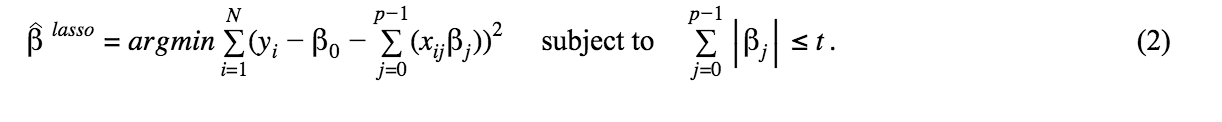

In [3]:
Image(filename = PATH + "eqn2.png", width=1000, height=100)

    This constraint problem can also be represented in lagrangian form as:

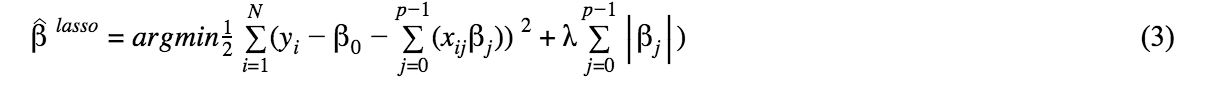

In [4]:
Image(filename = PATH + "eqn3.png", width=1000, height=100)

    Unfortunately, there is no closed-form solution for lasso like for basic least squares regression. But a unique solution for lasso can be calculated using efficient computer algorithms such as LAR (least angle regression).  We can turn to these algorithms once selecting a value for t, the constraint variable.  The more stringent the choice for t, the more shrinkage and variable selection the original linear model will experience.  It is possible to choose t such that the OLS and Lasso coefficients will be the same (i.e. if tj=1pjOLS), but that is usually not optimal in data with high dimensionality. Constraining the regression by limiting the sum of the absolute value of the coefficients is called L1 regularization.  The following figure gives the geometric interpretation of L1 regularization in the context of Lasso with one dependent variable:


<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson05/image_09.gif" alt="LASSO vs. Ridge" title="Geometric interpretation" />

   The blue square centered at the origin illustrates the constraint t. Smaller values for t reduce the size of the blue region. The point labeled $ \hat \beta$ represents the solution for the least squares minimization problem without constraint. The red ellipses around $ \hat \beta$ are level curves of the residual sum of squares from different combinations of $ \beta_1 $ and $\beta_2$ .  Lasso finds the solution where the residual sum of squares contour intersects the constraint square at one point. This point of intersection determines the new set of constrained coefficients. Since L1 regularization creates corners on the constraint region, a solution that touches ones of these corners will set one or more parameters to 0.


  Because varying choices t can dramatically affect the estimates, variance, and bias of a Lasso regression, the choice of tmust be a careful one.  The optimal choice of tis derived by minimizing an estimate of the expected predicted error. The best way to minimize the predicted error is by performing several iterations of cross-validation (k-fold cross-validation).  

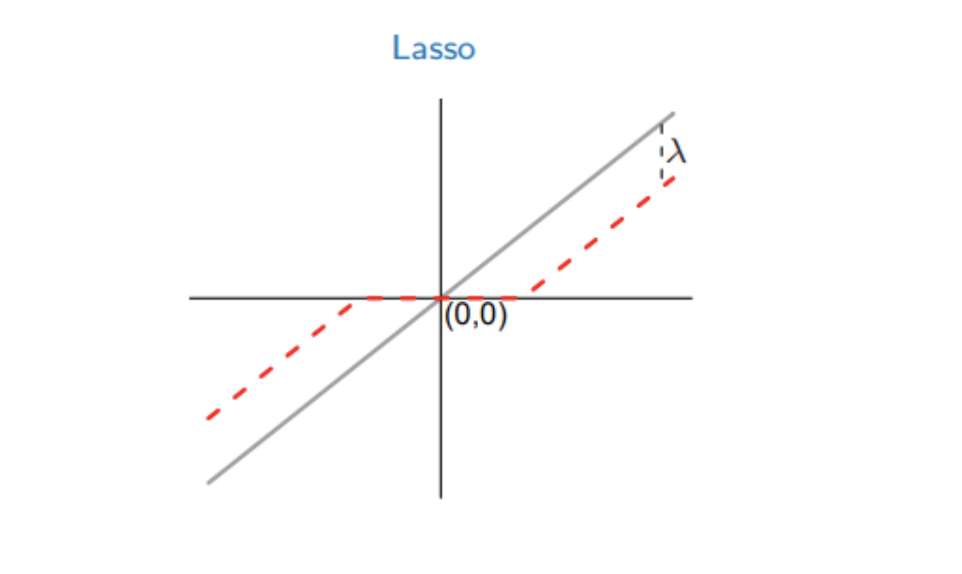

In [5]:
Image(filename = PATH + "linear.png", width=500, height=80)

   Figure 2 illustrates the effect of the tuning parameter from the lagrangian form.  Where the 45° line represents unconstrained coefficients in an othonormal setting (X'X=I), the red dotted lines shows how  reduces the values towards 0. At each point along the line,  is subtracted from the magnitude x, or  jlasso=sign(jols)(jols-)+. For each value of t, there is a corresponding value of  that gives the same solution. Constraint t and tuning parameter  have an inverse relationship: as tgoes to  and as  goes to 0, the coefficients converge to the OLS estimates.


### Application

We used a collective panel dataset of years 1975 and 2009 acquired from Penn World Table, World Bank Indicators, OECD Program for International Student Assessment (PISA), World Values Survey, and various researchers. It has over 95 variables for all 190 countries that relate to economic growth and development such as GDP, capital stock, productivity growth, total fertility rate, trade, labor share, political shares etc. The variable of our interest is life expectancy. From all those indicators, we seek to determine which indicators have the largest impact in predicting life expectancy of a country. 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import linear_model

import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warnings from SNS and SKLEARN
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
from subprocess import check_output

In [7]:
data = pd.read_csv('/Users/J.Alvarez/github/Lasso/movie_metadata.csv')
data = data.dropna(how='any')
data = data.drop(['movie_title','plot_keywords','movie_imdb_link','actor_3_name','actor_2_name','language','genres'],axis=1)
data = pd.get_dummies(data)

In [8]:
data.shape

(3756, 3162)

In [9]:
#Make and standardize Y variable
Y = data['imdb_score']
Y = (Y - Y.mean()) / Y.std()

In [10]:
#Make the X matrix. We need to exclude variables that aren't numbers and the Y variable
X = pd.DataFrame()
for col in list(data):
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64' or data[col].dtype == 'uint8') and (col != 'imdb_score'):
        X[col] = (data[col] - data[col].mean()) / data[col].std()

In [11]:
#Import the Machine learning package and split the data into train and test
from sklearn import linear_model
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y)

In [12]:
#declare the model
lasso = linear_model.Lasso(alpha=0.005)

In [13]:
#run the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
#Score the model
lasso.score(X_test, y_test)

0.38268388364871603

In [15]:
#output coefficients. Note that the first variable is collinear with our Y variable (coefficient of 0.9). This is why we get such
#high scores
lasso.coef_

array([ 0.15072889,  0.15322333,  0.00590042, ...,  0.05139778,
        0.        ,  0.01948155])

In [16]:
#for completeness I compare it to a linear regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Score linear regression. Note that without lasso biasing the result down we now get an R^2 of 1.
linear.score(X_test,y_test)

-6.2098271888377232e+28

In [18]:
linear.coef_

array([  1.93654922e-01,   2.01536347e-01,   2.60240782e+02, ...,
        -5.68757778e+11,  -8.71946483e+10,  -5.88810058e+10])

In [19]:
#create the data
X1 = pd.DataFrame(np.random.uniform(low=0,high=1,size=(1000,100)))
eps = pd.Series(np.random.uniform(low=0,high=1,size=1000))
Y1 = 1/4 * (X1[0] + X1[1] + X1[2] + eps)
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1,Y1)

In [20]:
#create and fit regressions
lasso1 = linear_model.Lasso(alpha=0.002)
linear1 = linear_model.LinearRegression()
lasso1.fit(X1_train,Y1_train)
linear1.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#score lasso
lasso1.score(X1_test,Y1_test)

0.74669698809388763

In [22]:
#score OLS
linear1.score(X1_test,Y1_test)

0.7250148057140009

In [23]:
#see lasso params
lasso1.coef_

array([ 0.22543611,  0.22142076,  0.22387048,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.00589918,  0.  

Sources:

Arribas-Gil, A., K. Bertin, C. Meza, and V. Rivoirard. “Lasso-type Estimators for Semiparametric Nonlinear Mixed-Effects Models Estimation.” Statistics and Computing, 24, (3): 443 – 460. 

Chan-Lau, Jorge A. 2017. “Lasso Regressions and Forecasting Models in Applied Stress Testing.” IMF Working Paper WP/17/108. 

Hoerl, A. E. 1962. “Application of Ridge Analysis to Regression Problems.” Chemical Engineering Progress, 1958: 54–59. 

Tateishi, S., H. Matsui, and S. Konishi. 2010. “Nonlinear Regression Modeling via the Lasso-Type Regularization.” Journal of Statistical Planning and Inference, 140, (5): 1125 – 1134. 

Tibshirani, Robert. 1996. “Regression Shrinkage and Selection via the Lasso.” Journal of the Royal Statistical Society 58, (1): 267-288. 